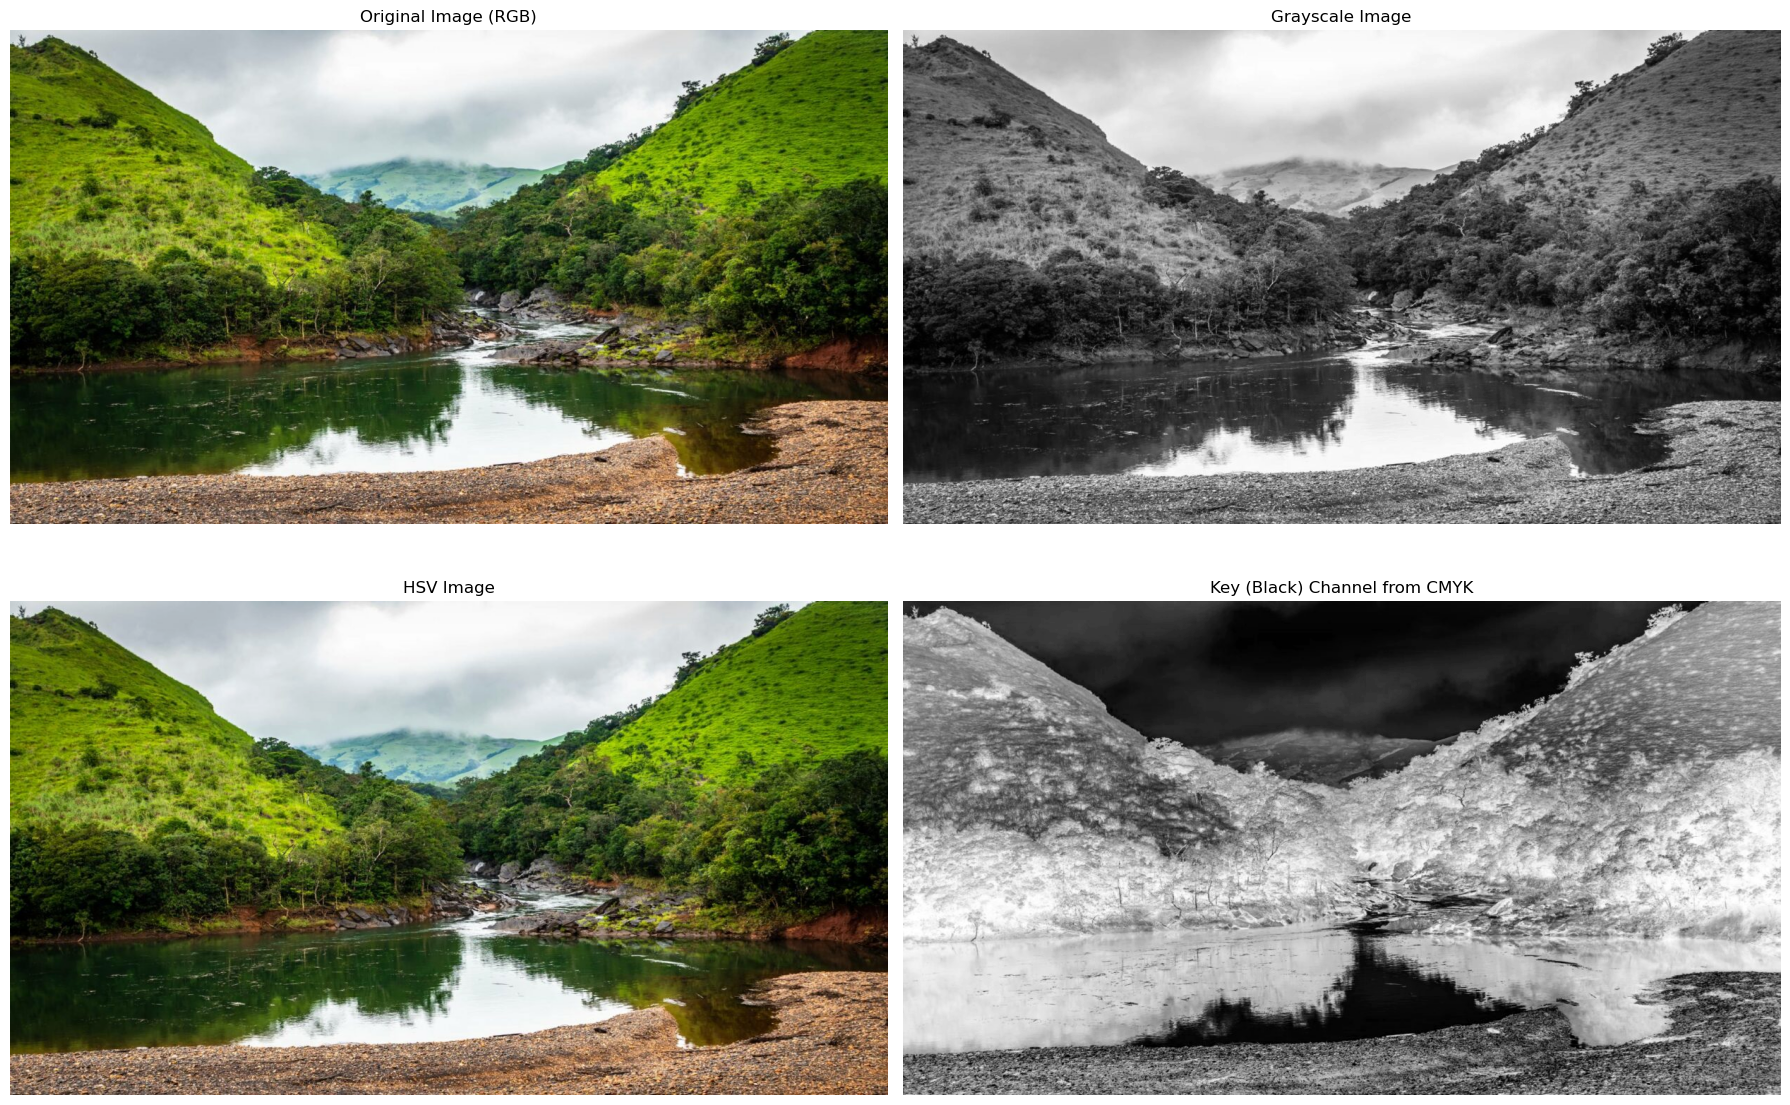

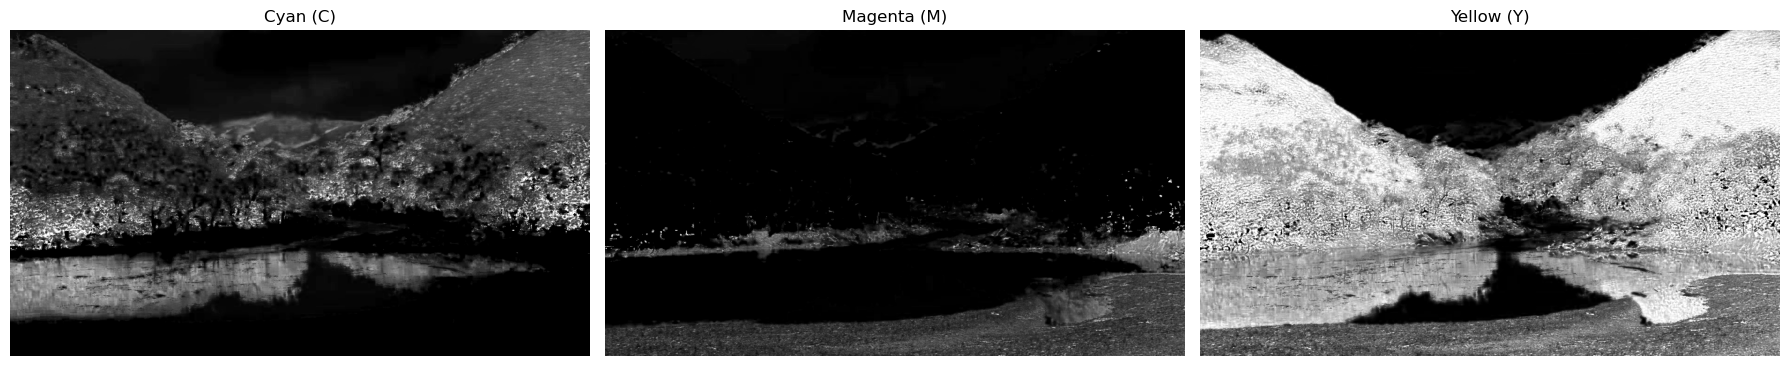

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('sample-image.jpg')

if image is None:
    print("Error: Could not load image.")
else:
    # Convert to different color spaces
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Convert RGB to CMYK
    def rgb_to_cmyk(rgb_img):
        rgb_norm = rgb_img.astype(float) / 255.0
        K = 1 - np.max(rgb_norm, axis=2)
        K_safe = np.where(K == 1, 1, K)
        C = (1 - rgb_norm[:, :, 0] - K) / (1 - K_safe + 1e-10)
        M = (1 - rgb_norm[:, :, 1] - K) / (1 - K_safe + 1e-10)
        Y = (1 - rgb_norm[:, :, 2] - K) / (1 - K_safe + 1e-10)
        cmyk = (np.dstack((C, M, Y, K)) * 255).clip(0, 255).astype(np.uint8)
        return cmyk

    image_cmyk = rgb_to_cmyk(image_rgb)
    c, m, y, k = cv2.split(image_cmyk)

    # Plot RGB, Grayscale, HSV
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image (RGB)')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(image_gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))
    plt.title('HSV Image')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(k, cmap='gray')
    plt.title('Key (Black) Channel from CMYK')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Plot CMY channels
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(c, cmap='gray')
    plt.title('Cyan (C)')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(m, cmap='gray')
    plt.title('Magenta (M)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(y, cmap='gray')
    plt.title('Yellow (Y)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()